Converged Value Function: [68.85250391 67.48658213 62.40697319]
Optimal Policy: [0 0 0]


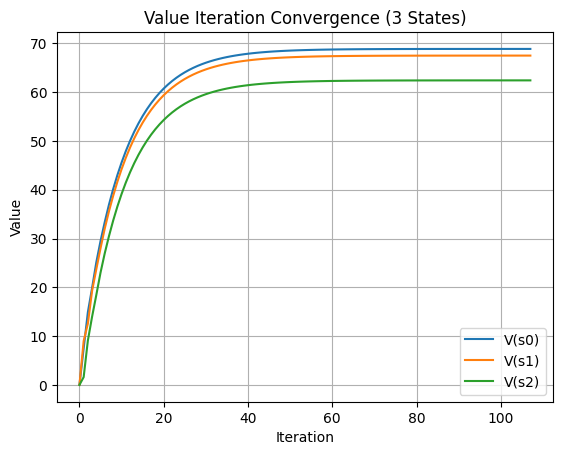

In [ ]:
"""
This code implements a simple Value Iteration algorithm on a small 3-state MDP 
with 2 actions per state and stochastic transitions. The goal of this is to iteratively 
compute the value function V for each state and determine the optimal policy pi. 
Discount factor beta is set to 0.85, and convergence is determined when the 
maximum change in the value function across all states falls below 1e-4 (threshold). 
The MDP transition probabilities and rewards are explicitly defined in a dictionary.
"""

import numpy as np
import matplotlib.pyplot as plt

S = [0, 1, 2]
A = [0, 1]
beta = 0.85

P = {
    0: {0: [(0.5, 0, 5), (0.5, 1, 10)],
        1: [(0.7, 1, 0), (0.3, 2, 20)]},
    1: {0: [(0.4, 0, 0), (0.6, 2, 15)],
        1: [(0.3, 1, 10), (0.7, 2, 5)]},
    2: {0: [(0.8, 0, 2), (0.2, 2, 0)],
        1: [(1.0, 1, 1)]}
}

V = np.zeros(len(S))
threshold = 1e-4
history = [V.copy()]

while True:
    delta = 0
    V_new = np.zeros_like(V)
    for s in S:
        q_sa = []
        for a in A:
            q_val = 0
            for t in P[s][a]:
                prob, next_s, reward = t
                q_val += prob * (reward + beta * V[next_s])
            q_sa.append(q_val)
        max_q = q_sa[0]
        for val in q_sa:
            if val > max_q:
                max_q = val
        V_new[s] = max_q
        if abs(V_new[s] - V[s]) > delta:
            delta = abs(V_new[s] - V[s])
    V = V_new
    history.append(V.copy())
    if delta < threshold:
        break

pi = np.zeros(len(S), dtype=int)
for s in S:
    q_sa = []
    for a in A:
        q_val = 0
        for t in P[s][a]:
            prob, next_s, reward = t
            q_val += prob * (reward + beta * V[next_s])
        q_sa.append(q_val)
    max_val = q_sa[0]
    best_a = 0
    for i, val in enumerate(q_sa):
        if val > max_val:
            max_val = val
            best_a = i
    pi[s] = best_a

print("Converged Value Function:", V)
print("Optimal Policy:", pi)

history = np.array(history)
plt.plot(history[:,0], label='V(s0)')
plt.plot(history[:,1], label='V(s1)')
plt.plot(history[:,2], label='V(s2)')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value Iteration Convergence (3 States)')
plt.legend()
plt.grid(True)
plt.show()
